In [231]:
# いつも使うやつ
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interp
import seaborn as sns

# pandasで全ての列を表示
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# 図をipython notebook内で表示
%matplotlib inline

# DeplicatedWarningを避けるため
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import sys
sys.path.append('./lib/')

# 交差検定をサクッとやるためのモジュールを読み込む
from sklearn.model_selection import cross_val_score

# 説明変数つくるための関数
import feature_process_helper
import get_data
import learn
import my_validate

# submissionを書き込む関数
import write_submission

In [2]:
# データをそれぞれ読み込む
train_df, test_df, submission_df = get_data.get(path='./data')
train = train_df.copy()
test = test_df.copy()

In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


### ここまでのまとめ

* データを眺めた結果
    * チケット重複（家族関係？ 何らかの関係）でグルーピングした変数作成
    * チケットの先頭文字でダミー変数作成
        * 数値だけはNothingにした
    * チケット重複をカウントした変数
    * CabinのNull値をもとにダミー変数作成
    * 家族の数を合計した変数作成
    * Ageを10で区分にしてクラス化した変数
        * これってダミー変数にしないとダメじゃね？


### これからできそうなこと

* モデルのチューニング
    * いまランダムフォレストだけしかチューニングしていない
* データとにらめっこ
    * キャビンに複数値があるのはなんだろう？
    * 同じ苗字の人でグルーピング
    * 年齢の欠損値を平均ではなく、Pclass毎で中央値にしてみる？
        * それとも予測しようかね

### 変数作成

#### 同じ苗字の人でグルピング

In [205]:
train[train['Name'].apply(lambda x: x.split(',')[0]).duplicated() | train['Name'].apply(lambda x: x.split(',')[0]).duplicated(keep='last')].sort_values(by='Name')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.00,1,1,C.A. 2673,20.2500,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.00,1,1,C.A. 2673,20.2500,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.00,1,0,P/PP 3381,24.0000,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.00,1,0,P/PP 3381,24.0000,NaN,C
210,211,0,3,"Ali, Mr. Ahmed",male,24.00,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S
784,785,0,3,"Ali, Mr. William",male,25.00,0,0,SOTON/O.Q. 3101312,7.0500,NaN,S
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S


うん。いい感じ。同じ苗字な人で全く関係なさそうなやつはどうしょうかね？

とりあえずそういう人はシカトしておく

In [206]:
_name_title = train[train['Name'].apply(lambda x: x.split(',')[0]).duplicated() | train['Name'].apply(lambda x: x.split(',')[0]).duplicated(keep='last')]['Name']

In [217]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
_name_title_class = _name_title.apply(lambda x: x.split(',')[0])
le.fit(_name_title_class)
le.transform(_name_title_class)

array([ 20,  45,   3,  85,  98,  68,  90, 112,   5, 106, 130, 125,  98,
         8,  43,  82,  63, 125,  93, 123,  75,   7,  99,  55, 127,  48,
        56, 114,  87,   5,  48,  23,  10,  42,  43,  36,  38,  71, 103,
       128,  67,  50,  85, 132,  70,   9, 123,  13,   5,  60,  90, 126,
       128,  93, 102,  45,  18,  52,   5,  42,  91, 100,  95, 130, 111,
        24,  99,  47, 114, 106,  68, 115,  77, 111,   8,  15,  94,  19,
        91,  21,  95, 111, 117,  10,   2,  92,  65,  56,  64,  77,  56,
        76,   8,  30, 132,  88,   9,  83,  53,  16,  26, 117,  78, 108,
       115,   8, 119,  99,  49,  81,   6, 106,   0,  96, 115,  17,   4,
        13,  73,  80,  68,  72, 130,   4, 101,   1,  58, 109,  57,  71,
       129,  23, 111,  47,  61,  80,  49, 125,  44, 100,  91,  43,  21,
       115,  31,  40,   7, 114,  12,  94,  98,  82,  50,  89,  63,  35,
        48,  26,  50,  92, 112,  67,  96,  70,  52,  97, 107,  77,  57,
        83, 124,  34, 108,  41, 122, 113,  26,  42, 107,  43,  5

100はまずいような気がする...

フラグにします。

In [219]:
train['SameLastName'] = 0
train.loc[train['Name'].apply(lambda x: x.split(',')[0]).duplicated() | train['Name'].apply(lambda x: x.split(',')[0]).duplicated(keep='last'), 'SameLastName'] = 1

#### 年齢の予測

In [181]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['Sex']) 
print(list(le.classes_))

# こりゃすごい
le.transform(train['Sex'])

['female', 'male']


array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0,

In [182]:
train['SexInt'] = le.transform(train['Sex'])
test['SexInt'] = le.transform(test['Sex'])

In [183]:
# 名前の敬称を取得
train, test = feature_process_helper.names(train, test)

In [184]:
le = preprocessing.LabelEncoder()
le.fit(train['Name_Title'])
train['Name_Title_Class'] = le.transform(train['Name_Title'])

In [169]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexInt,Name_Len,Name_Title,Name_Title_Class
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,23,Mr.,11
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,51,Mrs.,12
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,22,Miss.,8
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,44,Mrs.,12
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,1,24,Mr.,11


In [118]:
x_train = train.loc[train['Age'].isnull() == False, ['Pclass', 'SexInt', 'Parch', 'SibSp', 'Name_Len', 'Name_Title_Class']]
y_train = train.loc[train['Age'].isnull() == False, 'Age']

In [119]:
# 重回帰で試してみる


from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True)
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [120]:
# 回帰係数
print(linear_model.coef_)

# 切片 (誤差)
print(linear_model.intercept_)

# 決定係数
print(linear_model.score(x_train, y_train))

[ -6.57392692e+00   1.85012607e+00  -1.01315159e+00  -3.09832354e+00
   2.99644046e-03   2.05610067e+00]
24.1698466514
0.301211954921


In [121]:
# 結果が小数点になっているので、どうにか丸めてやってみる
len(y_train[y_train == np.round(linear_model.predict(x_train))]) / len(y_train) * 100

4.061624649859944

ひっく...


In [122]:
# どっちも丸めてやってみる
len(y_train[np.round(y_train) == np.round(linear_model.predict(x_train))]) / len(y_train) * 100

4.201680672268908

かわらん

年齢推測やめた

In [185]:
# Pclassと敬称毎にグループ化した中央値をとってみる

not_null_age = train.loc[train['Age'].isnull() == False, :]
median = not_null_age.groupby(['Pclass', 'Name_Title'])[['Age']].median().reset_index()

def grouping_pclass_name_title_median(x):
        _pclass = median[median['Pclass'] == x['Pclass']]
        _is_name_title = _pclass[_pclass['Name_Title'] == x['Name_Title']]
        if _is_name_title.empty == False:
            return int(_is_name_title['Age'])
        return 0

train.loc[train['Age'].isnull() == True, 'Age'] = train.loc[train['Age'].isnull() == True, ['Pclass', 'Name_Title']].apply(grouping_pclass_name_title_median, axis=1)

In [171]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexInt,Name_Len,Name_Title,Name_Title_Class
0,1,0,3,male,22.00,1,0,A/5 21171,7.2500,NaN,S,1,23,Mr.,11
1,2,1,1,female,38.00,1,0,PC 17599,71.2833,C85,C,0,51,Mrs.,12
2,3,1,3,female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,0,22,Miss.,8
3,4,1,1,female,35.00,1,0,113803,53.1000,C123,S,0,44,Mrs.,12
4,5,0,3,male,35.00,0,0,373450,8.0500,NaN,S,1,24,Mr.,11
5,6,0,3,male,26.00,0,0,330877,8.4583,NaN,Q,1,16,Mr.,11
6,7,0,1,male,54.00,0,0,17463,51.8625,E46,S,1,23,Mr.,11
7,8,0,3,male,2.00,3,1,349909,21.0750,NaN,S,1,30,Master.,7
8,9,1,3,female,27.00,0,2,347742,11.1333,NaN,S,0,49,Mrs.,12
9,10,1,2,female,14.00,1,0,237736,30.0708,NaN,C,0,35,Mrs.,12


#### キャビンの複数値を調べる

In [186]:
train[train['Cabin'].isnull() == False]['Cabin'].apply(lambda x: x.split(' '))

1                     [C85]
3                    [C123]
6                     [E46]
10                     [G6]
11                   [C103]
21                    [D56]
23                     [A6]
27          [C23, C25, C27]
31                    [B78]
52                    [D33]
54                    [B30]
55                    [C52]
61                    [B28]
62                    [C83]
66                    [F33]
75                 [F, G73]
88          [C23, C25, C27]
92                    [E31]
96                     [A5]
97               [D10, D12]
102                   [D26]
110                  [C110]
118              [B58, B60]
123                  [E101]
124                   [D26]
128                [F, E69]
136                   [D47]
137                  [C123]
139                   [B86]
148                    [F2]
151                    [C2]
166                   [E33]
170                   [B19]
174                    [A7]
177                   [C49]
183                 

恐らく家族や何かしたら関連した人がいるんだと思う

In [ ]:
train['CabinCount'] = pd.Series()
train.loc[train['Cabin'].isnull() == False, 'CabinCount'] = train[train['Cabin'].isnull() == False]['Cabin'].apply(lambda x: len(x.split(' ')))
train.loc[train['Cabin'].isnull() == True, 'CabinCount'] = 0
train.loc[:, 'CabinCount'] = train['CabinCount'].astype(int)

これらを関数化する

In [13]:
train_df, test_df, submission_df = get_data.get(path='./data')
train = train_df.copy()
test = test_df.copy()

In [14]:
train, test = feature_process_helper.names(train, test, submission_df)
train, test = feature_process_helper.age_null_flag(train, test)
train, test = feature_process_helper.age_impute3(train, test)
train, test = feature_process_helper.age_class(train, test)
train, test = feature_process_helper.apply_ticket_count(train, test)
train, test = feature_process_helper.family_size_int(train, test)
train, test = feature_process_helper.same_ticket_grouping(train, test, submission_df)
train, test = feature_process_helper.ticket_dummies(train, test)
train ,test = feature_process_helper.ticket_length(train, test)
train, test = feature_process_helper.cabin_count(train, test)
train, test = feature_process_helper.cabin_null_flag(train, test)
train, test = feature_process_helper.cabin_num(train, test)
train, test = feature_process_helper.cabin(train, test)
train, test = feature_process_helper.embarked_impute(train, test)
train, test = feature_process_helper.fam_size(train, test)
train, test = feature_process_helper.dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked',
                                                                     'Cabin_Letter', 'Name_Title', 'Fam_Size', 'SameTicket', 'Ticket_Prefix', 'AgeClass'])
train, test = feature_process_helper.drop(train, test, bye = [
    'Sex_male',
    'Ticket',
])

test['Fare'].fillna(train['Fare'].mean(), inplace = True)

In [15]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Name_Len,SameLastName,Age_Null_Flag,TicketCount,FamilySize,Ticket_Len,CabinCount,Cabin_Null_Flag,"Cabin_num_[2, 28.667]","Cabin_num_(28.667, 65.667]","Cabin_num_(65.667, 148]",Pclass_3,Pclass_1,Pclass_2,Sex_female,Embarked_S,Embarked_C,Embarked_Q,Cabin_Letter_n,Cabin_Letter_C,Cabin_Letter_E,Cabin_Letter_G,Cabin_Letter_D,Cabin_Letter_A,Cabin_Letter_B,Cabin_Letter_F,Name_Title_Mr.,Name_Title_Mrs.,Name_Title_Miss.,Name_Title_Master.,Name_Title_Rev.,Name_Title_Dr.,Name_Title_Ms.,Name_Title_Col.,Fam_Size_Nuclear,Fam_Size_Solo,Fam_Size_Big,SameTicket_Not_Same,SameTicket_Male_Female,SameTicket_Only_Male,SameTicket_Only_Female,Ticket_Prefix_A/5,Ticket_Prefix_PC,Ticket_Prefix_STON/O2.,Ticket_Prefix_Nothing,Ticket_Prefix_PP,Ticket_Prefix_A/5.,Ticket_Prefix_C.A.,Ticket_Prefix_A./5.,Ticket_Prefix_SC/Paris,Ticket_Prefix_CA,Ticket_Prefix_S.O.C.,Ticket_Prefix_W./C.,Ticket_Prefix_SOTON/OQ,Ticket_Prefix_W.E.P.,Ticket_Prefix_STON/O,Ticket_Prefix_C,Ticket_Prefix_SOTON/O.Q.,Ticket_Prefix_SC/PARIS,Ticket_Prefix_A.5.,Ticket_Prefix_CA.,Ticket_Prefix_F.C.C.,Ticket_Prefix_SC,Ticket_Prefix_SC/AH,Ticket_Prefix_A/4,Ticket_Prefix_S.O./P.P.,Ticket_Prefix_F.C.,Ticket_Prefix_SOTON/O2,Ticket_Prefix_S.C./PARIS,AgeClass_20,AgeClass_30,AgeClass_50,AgeClass_0,AgeClass_10,AgeClass_40,AgeClass_60,AgeClass_70
0,1,0,22.0,1,0,7.2500,23,1,0,0,2,9,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2,1,38.0,1,0,71.2833,51,1,0,0,2,8,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,22,0,0,0,1,16,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,1,35.0,1,0,53.1000,44,1,0,2,2,6,1,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,0,35.0,0,0,8.0500,24,1,0,0,1,6,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [16]:
search = learn.search(train.iloc[:, 2:],  train.iloc[:, 1])
model = learn.learn(train.iloc[:, 2:], train.iloc[:, 1], parameter=search.best_params_)

In [17]:
cv_scores = cross_val_score(model, train.iloc[:, 2:], train.iloc[:, 1], cv=10, n_jobs=-1)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(cv_scores), np.std(cv_scores)))

CV accuracy: 0.829 +/- 0.032


In [18]:
my_validatedatedatedate.get_feature_importances(train.iloc[:, 2:], model)

,variable,importance
18,Sex_female,0.159043
30,Name_Title_Mr.,0.129117
4,Name_Len,0.079071
3,Fare,0.076291
0,Age,0.046373
15,Pclass_3,0.038623
32,Name_Title_Miss.,0.036551
31,Name_Title_Mrs.,0.032471
7,TicketCount,0.028524
9,Ticket_Len,0.024277


In [19]:
my_validate.cross(train.iloc[:, 1], model.predict(train.iloc[:, 2:]))

正解: 792
正解で生存を当てた: 286
正解で死亡を当てた: 506
予期しない: 43
欠落した: 56
間違い: 99


In [20]:
my_validate.matrix(train.iloc[:, 1], model.predict(train.iloc[:, 2:]))

[[506  43]
 [ 56 286]]


In [21]:
my_validate.get_threat_score(train.iloc[:, 1], model.predict(train.iloc[:, 2:]))

NameError: name 'train' is not defined

In [2]:
train_df, test_df, submission_df = get_data.get(path='./data')
train = train_df.copy()
test = test_df.copy()

In [3]:
train, test = feature_process_helper.names(train, test, submission_df)
train, test = feature_process_helper.age_null_flag(train, test)
train, test = feature_process_helper.age_impute3(train, test)
train, test = feature_process_helper.age_class(train, test)
train, test = feature_process_helper.apply_ticket_count(train, test)
train, test = feature_process_helper.family_size_int(train, test)
train, test = feature_process_helper.same_ticket_grouping(train, test, submission_df)
# train, test = feature_process_helper.ticket_dummies(train, test)
train ,test = feature_process_helper.ticket_length(train, test)
train, test = feature_process_helper.cabin_count(train, test)
train, test = feature_process_helper.cabin_null_flag(train, test)
train, test = feature_process_helper.cabin_num(train, test)
train, test = feature_process_helper.cabin(train, test)
train, test = feature_process_helper.embarked_impute(train, test)
train, test = feature_process_helper.fam_size(train, test)
train, test = feature_process_helper.dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked',
                                                                     'Cabin_Letter', 'Name_Title', 'Fam_Size', 'SameTicket', 'AgeClass'])
train, test = feature_process_helper.drop(train, test, bye = [
    'Sex_male',
    'Ticket',
])

test['Fare'].fillna(train['Fare'].mean(), inplace = True)

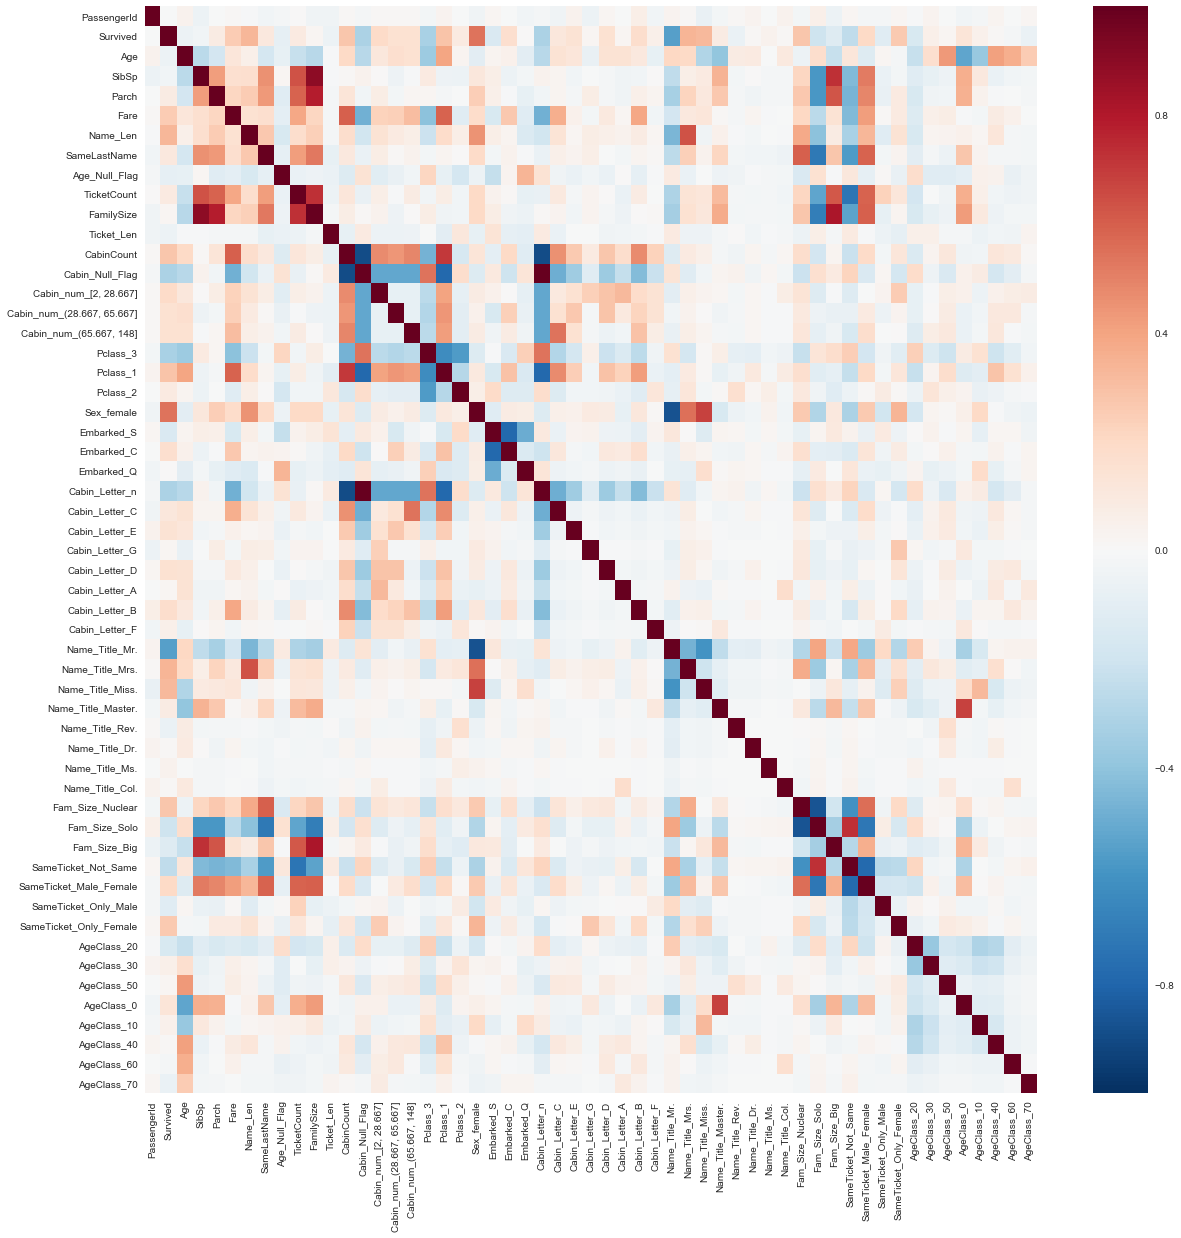

In [9]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(train.corr(), ax=ax)

In [10]:
search = learn.search(train.iloc[:, 2:],  train.iloc[:, 1])
model = learn.learn(train.iloc[:, 2:], train.iloc[:, 1], parameter=search.best_params_)

In [11]:
cv_scores = cross_val_score(model, train.iloc[:, 2:], train.iloc[:, 1], cv=10, n_jobs=-1)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(cv_scores), np.std(cv_scores)))

CV accuracy: 0.831 +/- 0.042


In [14]:
my_validate.get_feature_importances(train.iloc[:, 2:], model)

,variable,importance
30,Name_Title_Mr.,0.159417
18,Sex_female,0.143746
3,Fare,0.074389
4,Name_Len,0.066086
0,Age,0.053403
32,Name_Title_Miss.,0.051266
15,Pclass_3,0.040198
31,Name_Title_Mrs.,0.039639
7,TicketCount,0.030525
11,Cabin_Null_Flag,0.029981


In [15]:
my_validate.cross(train.iloc[:, 1], model.predict(train.iloc[:, 2:]))

正解: 799
正解で生存を当てた: 282
正解で死亡を当てた: 517
予期しない: 32
欠落した: 60
間違い: 92


In [16]:
my_validate.matrix(train.iloc[:, 1], model.predict(train.iloc[:, 2:]))

[[517  32]
 [ 60 282]]


In [20]:
tp, tn, fp, fn = my_validate.get_threat_score(train.iloc[:, 1:], train.iloc[:, 1], model.predict(train.iloc[:, 2:]))

282 : 517 : 32 : 60


In [22]:
write_submission._write(model=model, test=test.iloc[:, 1:], submission_df=submission_df)

0.78947

あがったぁあああああああああ！！！

In [26]:
train_df, test_df, submission_df = get_data.get(path='./data')
train = train_df.copy()
test = test_df.copy()

In [37]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [27]:
train, test = feature_process_helper.names(train, test, submission_df)
train, test = feature_process_helper.age_null_flag(train, test)
train, test = feature_process_helper.age_impute3(train, test)
train, test = feature_process_helper.age_class(train, test)
train, test = feature_process_helper.apply_ticket_count(train, test)
train, test = feature_process_helper.family_size_int(train, test)
train, test = feature_process_helper.same_ticket_grouping(train, test, submission_df)
# train, test = feature_process_helper.ticket_dummies(train, test)
train ,test = feature_process_helper.ticket_length(train, test)
train, test = feature_process_helper.cabin_count(train, test)
train, test = feature_process_helper.cabin_null_flag(train, test)
# train, test = feature_process_helper.cabin_num(train, test)
train, test = feature_process_helper.cabin(train, test)
# train, test = feature_process_helper.embarked_impute(train, test)
train, test = feature_process_helper.fam_size(train, test)
train, test = feature_process_helper.dummies(train, test, columns = ['Pclass', 'Sex',
                                                                     'Cabin_Letter', 'Name_Title', 'Fam_Size', 'SameTicket', 'AgeClass'])
train, test = feature_process_helper.drop(train, test, bye = [
    'Sex_male',
    'Ticket',
    'Embarked'
])

test['Fare'].fillna(train['Fare'].mean(), inplace = True)

In [28]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Name_Len,SameLastName,Age_Null_Flag,TicketCount,FamilySize,Ticket_Len,CabinCount,Cabin_Null_Flag,Pclass_3,Pclass_1,Pclass_2,Sex_female,Cabin_Letter_n,Cabin_Letter_C,Cabin_Letter_E,Cabin_Letter_G,Cabin_Letter_D,Cabin_Letter_A,Cabin_Letter_B,Cabin_Letter_F,Name_Title_Mr.,Name_Title_Mrs.,Name_Title_Miss.,Name_Title_Master.,Name_Title_Rev.,Name_Title_Dr.,Name_Title_Ms.,Name_Title_Col.,Fam_Size_Nuclear,Fam_Size_Solo,Fam_Size_Big,SameTicket_Not_Same,SameTicket_Male_Female,SameTicket_Only_Male,SameTicket_Only_Female,AgeClass_20,AgeClass_30,AgeClass_50,AgeClass_0,AgeClass_10,AgeClass_40,AgeClass_60,AgeClass_70
0,1,0,22.0,1,0,7.2500,23,1,0,0,2,9,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,2,1,38.0,1,0,71.2833,51,1,0,0,2,8,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,22,0,0,0,1,16,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
3,4,1,35.0,1,0,53.1000,44,1,0,2,2,6,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,5,0,35.0,0,0,8.0500,24,1,0,0,1,6,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0


In [29]:
search = learn.search(train.iloc[:, 2:],  train.iloc[:, 1])
model = learn.learn(train.iloc[:, 2:], train.iloc[:, 1], parameter=search.best_params_)

In [30]:
cv_scores = cross_val_score(model, train.iloc[:, 2:], train.iloc[:, 1], cv=10, n_jobs=-1)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(cv_scores), np.std(cv_scores)))

CV accuracy: 0.832 +/- 0.038


In [31]:
my_validate.get_feature_importances(train.iloc[:, 2:], model)

,variable,importance
15,Sex_female,0.143843
24,Name_Title_Mr.,0.136396
3,Fare,0.083007
4,Name_Len,0.078861
0,Age,0.062261
26,Name_Title_Miss.,0.041421
25,Name_Title_Mrs.,0.037882
9,Ticket_Len,0.037301
12,Pclass_3,0.035893
7,TicketCount,0.032336


In [32]:
my_validate.cross(train.iloc[:, 1], model.predict(train.iloc[:, 2:]))

正解: 811
正解で生存を当てた: 296
正解で死亡を当てた: 515
予期しない: 34
欠落した: 46
間違い: 80


In [33]:
my_validate.matrix(train.iloc[:, 1], model.predict(train.iloc[:, 2:]))

[[515  34]
 [ 46 296]]


In [34]:
tp, tn, fp, fn = my_validate.get_threat_score(train.iloc[:, 1:], train.iloc[:, 1], model.predict(train.iloc[:, 2:]))

296 : 515 : 34 : 46


In [35]:
write_submission._write(model=model, test=test.iloc[:, 1:], submission_df=submission_df)

0.78469

下がった

### 客室の場所の確認

<img src="./img/800px-Titanic_cutaway_diagram.png">

In [205]:
train_df, test_df, submission_df = get_data.get(path='./data')
train = train_df.copy()
test = test_df.copy()

In [51]:
train.loc[(train['Cabin'].isnull() == False) & (train['Pclass'] == 3), ['Pclass', 'Cabin']]

,Pclass,Cabin
10,3,G6
75,3,F G73
128,3,F E69
205,3,G6
251,3,G6
394,3,G6
429,3,E10
699,3,F G63
715,3,F G73
751,3,E121


In [49]:
train.loc[(train['Cabin'].isnull() == False) & (train['Pclass'] == 2), ['Pclass', 'Cabin']]

,Pclass,Cabin
21,2,D56
66,2,F33
123,2,E101
148,2,F2
183,2,F4
193,2,F2
292,2,D
303,2,E101
327,2,D
340,2,F2


In [50]:
train.loc[(train['Cabin'].isnull() == False) & (train['Pclass'] == 1), ['Pclass', 'Cabin']]

,Pclass,Cabin
1,1,C85
3,1,C123
6,1,E46
11,1,C103
23,1,A6
27,1,C23 C25 C27
31,1,B78
52,1,D33
54,1,B30
55,1,C52


予測できそうな感じ

In [63]:
train.loc[(train['Cabin'].isnull() == False) & (train['Pclass'] == 1), ['Pclass', 'Cabin']]['Cabin'].apply(lambda x: x[0]).value_counts()

C    59
B    47
D    29
E    25
A    15
T     1
Name: Cabin, dtype: int64

In [134]:
test.loc[(test['Cabin'].isnull() == False) & (test['Pclass'] == 1), ['Pclass', 'Cabin']]['Cabin'].apply(lambda x: x[0]).value_counts()

C    35
B    18
D    11
E     9
A     7
Name: Cabin, dtype: int64

In [64]:
train.loc[(train['Cabin'].isnull() == False) & (train['Pclass'] == 2), ['Pclass', 'Cabin']]['Cabin'].apply(lambda x: x[0]).value_counts()

F    8
D    4
E    4
Name: Cabin, dtype: int64

In [135]:
test.loc[(test['Cabin'].isnull() == False) & (test['Pclass'] == 2), ['Pclass', 'Cabin']]['Cabin'].apply(lambda x: x[0]).value_counts()

F    5
D    2
Name: Cabin, dtype: int64

In [65]:
train.loc[(train['Cabin'].isnull() == False) & (train['Pclass'] == 3), ['Pclass', 'Cabin']]['Cabin'].apply(lambda x: x[0]).value_counts()

F    5
G    4
E    3
Name: Cabin, dtype: int64

In [136]:
test.loc[(test['Cabin'].isnull() == False) & (test['Pclass'] == 3), ['Pclass', 'Cabin']]['Cabin'].apply(lambda x: x[0]).value_counts()

F    3
G    1
Name: Cabin, dtype: int64

In [106]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinPrefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [208]:
test_copy = test.copy()
test_copy.insert(1, 'Survived', submission_df['Survived'])
all = pd.concat([train, test_copy], axis=0)
all = all[train.columns]

all.loc[all['Cabin'].isnull() == False, 'CabinPrefix'] = all.loc[all['Cabin'].isnull() == False, 'Cabin'].apply(lambda x: x[0])

In [209]:
x_cabin_train = all.loc[all['Cabin'].isnull() == False, ['Pclass', 'Fare']]
x_cabin_train['Name_Length'] = all.loc[all['Cabin'].isnull() == False, 'Name'].apply(lambda x: len(x))
x_cabin_train['Name_Length'] = all.loc[all['Cabin'].isnull() == False, 'Cabin'].apply(lambda x: len(x.split(' ')))
y_cabin_train = all.loc[all['Cabin'].isnull() == False, 'CabinPrefix']

In [212]:
y_cabin_train.value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: CabinPrefix, dtype: int64

In [214]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_cabin_train)
print(le.classes_)

y_cabin_encode_train = le.transform(y_cabin_train)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T']


In [215]:
print(len(x_cabin_train), ' ', len(y_cabin_encode_train))

295   295


In [216]:
search = learn.search(x_cabin_train,  y_cabin_encode_train)
model = learn.learn(x_cabin_train, y_cabin_encode_train, parameter=search.best_params_)

/Users/k.tamashiro/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


In [217]:
search.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 700}

In [218]:
cv_scores = cross_val_score(model, x_cabin_train, y_cabin_encode_train, cv=10, n_jobs=-1)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(cv_scores), np.std(cv_scores)))

/Users/k.tamashiro/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


CV accuracy: 0.673 +/- 0.101


In [219]:
my_validate.get_feature_importances(x_cabin_train, model)

,variable,importance
1,Fare,0.857080
0,Pclass,0.090815
2,Name_Length,0.052105


In [262]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

train_df, test_df, submission_df = get_data.get(path='./data')
train = train_df.copy()
test = test_df.copy()

def cabin_fillna(train, test, submission_df):
    test_copy = test.copy()
    test_copy.insert(1, 'Survived', submission_df['Survived'])
    all = pd.concat([train, test_copy], axis=0)
    all = all[train.columns]
    all.loc[all['Cabin'].isnull() == False, 'CabinPrefix'] = all.loc[all['Cabin'].isnull() == False, 'Cabin'].apply(lambda x: x[0])
    all.loc[all['Fare'].isnull() == True, 'Fare'] = all['Fare'].median()

    x = all.loc[all['Cabin'].isnull() == False, ['Pclass', 'Fare']]
    all['Name_Length'] = all['Name'].apply(lambda x: len(x))
    x['Name_Length'] = all.loc[all['Cabin'].isnull() == False, 'Name_Length']
    _y = all.loc[all['Cabin'].isnull() == False, 'CabinPrefix']

    label = LabelEncoder()
    label.fit(_y)
    y = label.transform(_y)

    search_parameter = {
      'criterion': 'entropy',
      'min_samples_leaf': 1,
      'min_samples_split': 2,
      'n_estimators': 100
    }
    rf = RandomForestClassifier(max_features='auto',
                                    oob_score=True,
                                    random_state=1,
                                    n_jobs=-1)
    rf.set_params(**search_parameter)
    rf.fit(x, y)

    all['CabinPrefix'] = label.inverse_transform(rf.predict(all[['Pclass', 'Fare', 'Name_Length']]))
    del all['Name_Length']
    
    train = all.iloc[:len(train), :]
    test = all.iloc[len(train):, ]
    
    return train, test

In [263]:
train, test = cabin_fillna(train, test, submission_df)

重くなってきたので、シフト